### <center> Pre-trained face recognition </center>

In [36]:
import face_recognition
import PIL.Image
import PIL.ImageDraw

### I. Loading image

In [37]:
image = face_recognition.load_image_file("people.jpg")

In [38]:
pil_image = PIL.Image.fromarray(image)

### II. Face detection

- Detecting face locations by finding coordinates corresponding the each face
- The approach is a sliding machine learning classifier but we will use dlib pretrained state-of-the-art model

#### 1. Faces coordinates

In [39]:
face_locations = face_recognition.face_locations(image)

In [40]:
print("%d face(s) found!" % len(face_locations))

6 face(s) found!


#### 2. Drawing coordinates

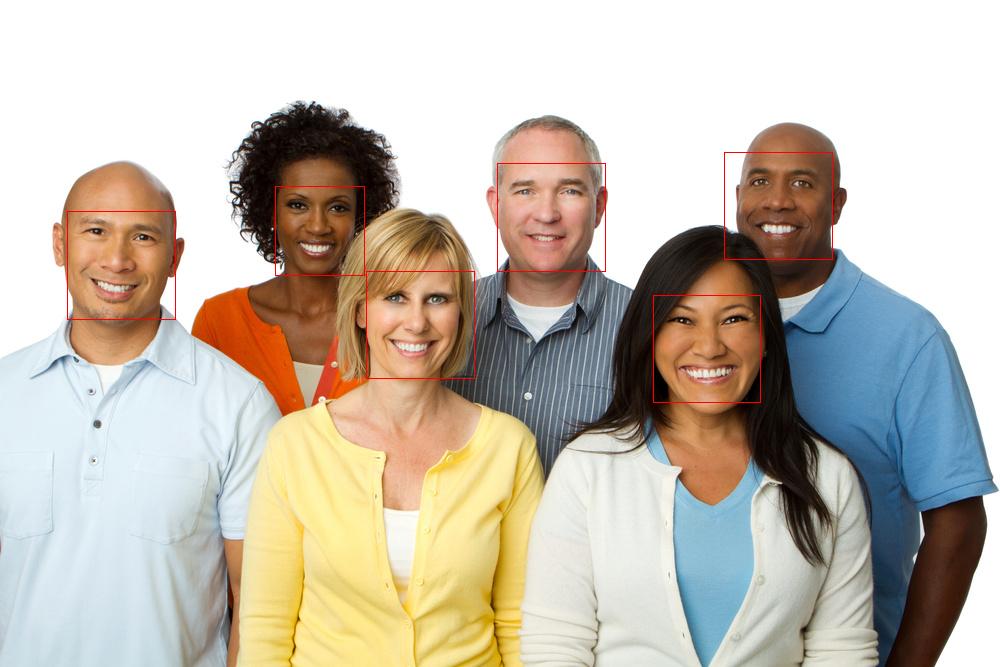

In [41]:
draw = PIL.ImageDraw.Draw(pil_image)
for face_loc in face_locations:
    top, right, bot, left = face_loc
    draw.rectangle([left, top, right, bot], outline='red')
pil_image

### III. Face landmarks detection

#### 1. Landmarks coordinates 

In [42]:
face_landmarks = face_recognition.face_landmarks(image)

In [43]:
print('Number of facelandmarks found is: %d' % len(face_landmarks))

Number of facelandmarks found is: 6


#### 2. Drawing landmarks

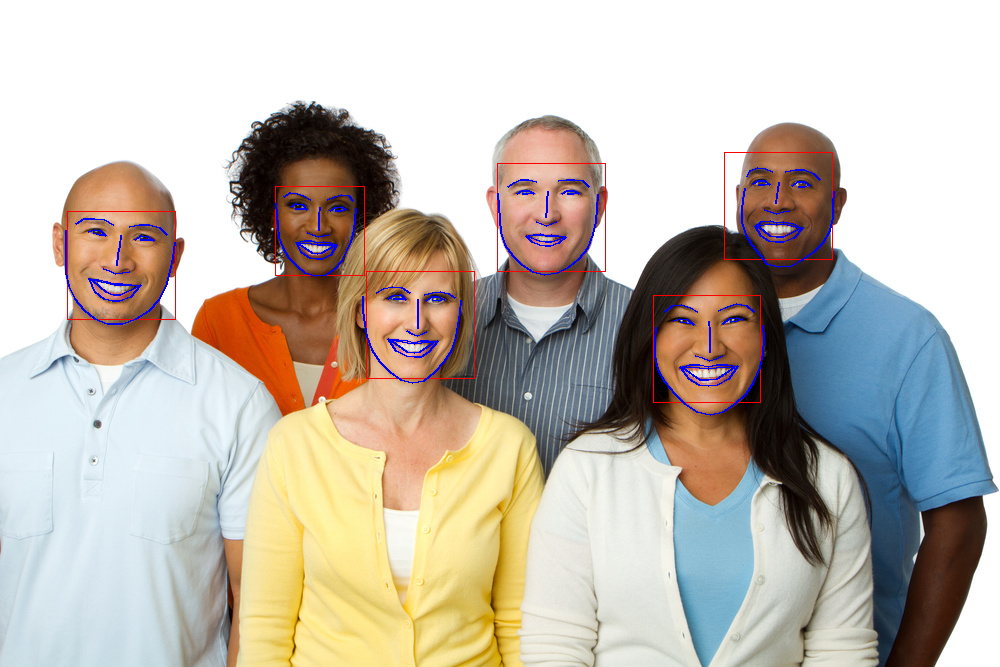

In [46]:
for face_lm in face_landmarks:
    for name, points in face_lm.items():
        #print("The {} in this face has the following points: {}".format(name, points))
        draw.line(points, fill='blue', width=2)
pil_image

### IV. Face encodings

In [49]:
face_encodings = face_recognition.face_encodings(image)
if len(face_encodings) == 0:
    print("No faces were found!")
else:
    first_face_encoding = face_encodings[0]
    print('Encodings size: {}'.format(len(first_face_encoding)))
    print(first_face_encoding)

Encodings size: 128
[-0.08102002  0.19778648  0.10116202 -0.10768926 -0.08938848 -0.0051124
 -0.02069698 -0.01189597  0.13854286  0.05478634  0.26563567 -0.00901977
 -0.27633318 -0.10323296 -0.13193214  0.20519768 -0.17141552 -0.0534021
 -0.17822698 -0.03385314  0.06798737  0.06815895 -0.02067376  0.01341064
 -0.0798282  -0.29371518 -0.02055131 -0.09726715  0.00150193 -0.13555917
 -0.01348892  0.149285   -0.10260151 -0.09903324  0.04098056  0.04845271
 -0.0095956   0.01337791  0.16898043  0.06358174 -0.13881597  0.08453506
  0.07367077  0.31221765  0.20606795  0.05827205  0.08826714 -0.06527514
  0.12916695 -0.30328029  0.01255909  0.14367844  0.13355717  0.12681633
  0.10245252 -0.15223342 -0.00435856  0.17431585 -0.14850871  0.09651553
  0.02589577 -0.18498759 -0.05150758 -0.09657746  0.15796225  0.03747438
 -0.12108739 -0.03004657  0.16765036 -0.06757218 -0.09263331  0.03642856
 -0.10270913 -0.10475127 -0.3123022   0.06945308  0.35907561  0.19123578
 -0.27626169 -0.03136463 -0.07415

### V. Face recognition

- For simplification, we will encode 3 images of 3 different persons and we will try to figure out to which unknown image identifies. 

#### 1. Reading db people images

In [54]:
person1 = face_recognition.load_image_file('people/person_1.jpg')
person2 = face_recognition.load_image_file('people/person_2.jpg')
person3 = face_recognition.load_image_file('people/person_3.jpg')

#### 2. Encoding db images

In [56]:
encoding1 = face_recognition.face_encodings(person1)[0]
encoding2 = face_recognition.face_encodings(person2)[0]
encoding3 = face_recognition.face_encodings(person3)[0]

In [57]:
known_faces = [encoding1, encoding2, encoding3]

#### 3. Loading image to check

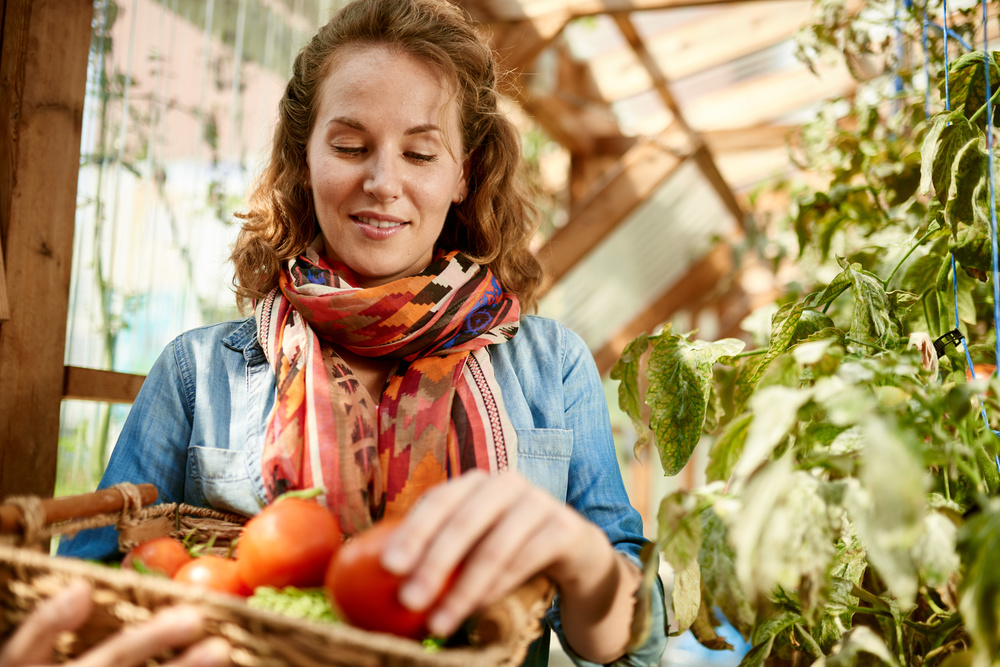

In [60]:
i = 4
unknown = face_recognition.load_image_file('unknown_people/unknown_%d.jpg'%i)
PIL.Image.fromarray(unknown)

- Encoding unknown image

In [61]:
unknown_encoding = face_recognition.face_encodings(unknown)

#### 4. Faces comparisons

In [63]:
for unknown_enc in unknown_encoding:
    results = face_recognition.compare_faces(known_faces, unknown_enc, tolerance=0.6)
    name = "Unknown"
    if results[0]:
        name = "Person 1"
    elif results[1]:
        name = "Person 2"
    elif results[2]:
        name = "Person 3"
    print(f"Found {name} in the photo!")

Found Person 2 in the photo!


#### 5. Fine-tune face recognition with an upsample face detection

If no faces are found, it may mean that the faces are too small to be detected. We can upsample the images when doing face detection with the following command:

In [65]:
face_locations = face_recognition.face_locations(unknown, number_of_times_to_upsample=2)
print('Number of faces detected: {}'.format(len(face_locations)))
unknown_encoding = face_recognition.face_encodings(unknown, known_face_locations = face_locations)

Number of faces detected: 1
